<center><h1>Testing for Normality</h1></center>

**Imports of the usual needed libraries**

In [1]:
%maplotlib inline                 # enable charts to be embedded within the notebook
import pandas as pd               # data library
import scipy.stats as stats       # statistics library
import matplotlib.pyplot as plt   # plotting library
plt.style.use('ggplot')           # Use ggplot style instead of boring default style

**Fetch data from an Excel file**

In [ ]:
data = pd.read_excel(r'D:\temp\distribution_analysis.xlsx')

In [37]:
type(data)

pandas.core.frame.DataFrame

**Let's take a peek of the data**

In [32]:
data.head()

,FailureX
0,471
1,431
2,470
3,446
4,451


**Some simple summary statistics**

In [4]:
data.describe()

,FailureX
count,640.000000
mean,451.431250
std,14.968981
min,405.000000
25%,441.000000
50%,452.000000
75%,461.000000
max,495.000000


**Standard histogram**

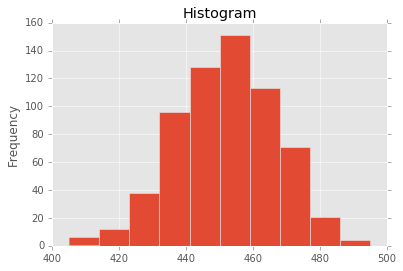

In [33]:
data.FailureX.plot.hist()
plt.title("Histogram")
plt.show()

**Normalized Histogram**

The area of a normalized histogram sums up to 1.

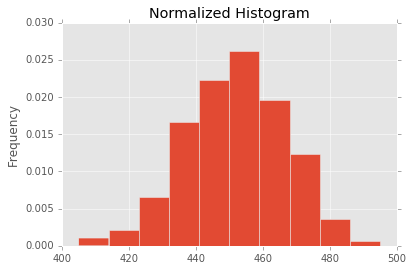

In [34]:
data.FailureX.plot.hist(normed=True)
plt.title("Normalized Histogram")
plt.show()

**Normal Q-Q Plot - [link](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) for reference**

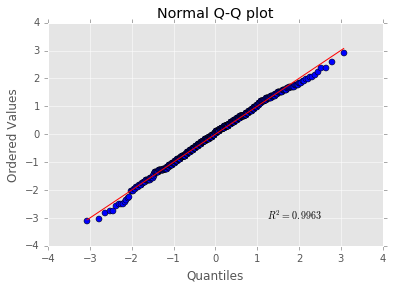

In [49]:
# Convert our sample data as standard normal (mean=0, std=1)
z = (data.FailureX-data.FailureX.mean())/data.FailureX.std()

# Create Normal Q-Q Plot
stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

So far we have visually inferred that the data follows a normal distribution.  But how would you test for normality using p-values of established tests for normality?  The stats package has a normaltest() function and uses the Pearson omnibus test.  There are other tests available but from established literature, it is recommended to use the Pearson test.

**Let's look up the documention for the normaltest() function using built-in help function:**

In [39]:
help(stats.normaltest)

Help on function normaltest in module scipy.stats.stats:

normaltest(a, axis=0)
    Tests whether a sample differs from a normal distribution.
    
    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.
    
    
    Parameters
    ----------
    a : array_like
        The array containing the data to be tested.
    axis : int or None, optional
        Axis along which to compute test. Default is 0. If None,
        compute over the whole array `a`.
    
    Returns
    -------
    statistic : float or array
        `s^2 + k^2`, where `s` is the z-score returned by `skewtest` and
        `k` is the z-score returned by `kurtosistest`.
    pvalue : float or array
       A 2-sided chi squared probability for the hypothesis test.
    
    References
    ----------
    .. [1] D'Agostino, R. B. (1971), "An omnibus t

**So let's do the Pearson normality test and see if the p-value is > 0.05 to test the null hypothesis that the sample data follows a normal distribution:**

In [47]:
statistic, pvalue = stats.normaltest(data.FailureX)
if pvalue > 0.05:
    print("Data most likely is normally distributed")
    print("The Pearson p-value was " + str(pvalue))
else:
    print("Data is not likely to be normally distributed")
    print("The Pearson p-value was " + str(pvalue))

Data most likely is normally distributed
The Pearson p-value was 0.13363951811


**So based on the Pearson normality test, we can not reject the null hypothesis that the sample data comes from the normal distribution.**

### Below is the script in its entirety

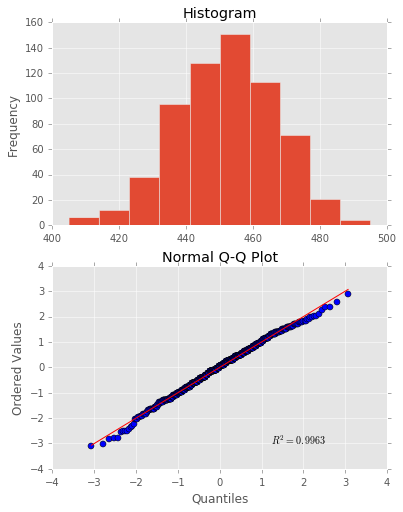

Sample data most likely normally distributed
The Pearson p-value was 0.13363951811


In [48]:
import pandas as pd               # data library
import scipy.stats as stats       # statistics library
import matplotlib.pyplot as plt   # plotting library
plt.style.use('ggplot')           # Use ggplot style instead of boring default style

# Read excel file as input
data = pd.read_excel(r'D:\temp\distribution_analysis.xlsx')

# Create figure with 2 rows x 1 column grid of charts with dimensions of 6" x 8"
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,8))

# Create histogram and place it as the first(top) chart
ax1 = plt.subplot(211)
data.FailureX.plot.hist()
ax1.set_title("Histogram")

# Create Q-Q plot and place it as the 2nd(bottom) chart
ax2 = plt.subplot(212)
z = (data.FailureX-data.FailureX.mean())/data.FailureX.std()
stats.probplot(z, dist="norm", plot=plt)
ax2.set_title("Normal Q-Q Plot")

# Display the chart on screen or inline
plt.show()

# Output the Pearson p-value
statistic, pvalue = stats.normaltest(data.FailureX)
if pvalue > 0.05:
    print("Sample data most likely normally distributed")
    print("Pearson p-value: " + str(pvalue))
else:
    print("Sample data is not likely normally distributed")
    print("Pearson p-value: " + str(pvalue))